In [69]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv("European_citiznes_rsvp.csv")
df.head()

,COUNTRY,SEX,YEAR,life_expectancy,average_number_of_calories_available_per_person_per_day,unemployment_rate,regular_daily_smokers,adult_overweight,alcahol_consumption_liter_per_capita,fat_available_ppd,protein_ppd,average_fruit_vegtable_ppd,annual_income,youth_unemployment_rate,Ischaemic_heart_diseas,circulatory_diseases,self_injury,total_hospital_beds
0,Austria,ALL,2000.0,78.47,2223.0,5.6,29.5,33.3,1.17,44.85,66.11,128.80,700.0,16.72,23.22,3353.71,1.52,11411.0
1,Austria,ALL,2001.0,78.95,2242.0,5.1,40.1,33.8,0.91,46.06,66.12,121.44,730.0,48.34,23.82,3411.79,1.65,11411.0
2,Austria,ALL,2002.0,79.01,2156.0,3.6,24.7,34.2,1.04,43.14,64.58,115.27,730.0,40.51,26.04,3464.58,2.50,11578.0
3,Austria,ALL,2003.0,78.89,2270.0,4.4,34.9,34.7,1.04,48.29,65.59,127.38,760.0,33.46,25.26,2825.93,4.53,11610.0
4,Austria,ALL,2004.0,79.43,2254.0,5.7,39.0,35.1,1.03,44.41,66.63,120.52,650.0,23.42,21.33,2569.84,6.34,12006.0


In [71]:
# filterByYear = df[df["YEAR"]==2000]
filterByYear = df
filterByYear[["COUNTRY","YEAR","life_expectancy"]].head()

,COUNTRY,YEAR,life_expectancy
0,Austria,2000.0,78.47
1,Austria,2001.0,78.95
2,Austria,2002.0,79.01
3,Austria,2003.0,78.89
4,Austria,2004.0,79.43


In [72]:
from sklearn.cluster import KMeans
import numpy as np

X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(filterByYear[["life_expectancy","life_expectancy"]])
kmeans.labels_
#kmeans.predict([[0, 0], [12, 3]])
kmeans.cluster_centers_

array([[78.26272189, 78.26272189],
       [73.76945578, 73.76945578],
       [81.57252066, 81.57252066]])

In [73]:
from sklearn.cluster import KMeans

y_pred = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(filterByYear[["YEAR","life_expectancy"]])
y_pred.predict(filterByYear[["YEAR","life_expectancy"]])
filterByYear["cluster"] = y_pred.labels_
filterByYear[["COUNTRY","YEAR","life_expectancy","cluster"]].head()

y_pred.cluster_centers_[:,1]
# y_pred.labels_

array([79.5631746 , 79.95796875, 73.4900885 ])

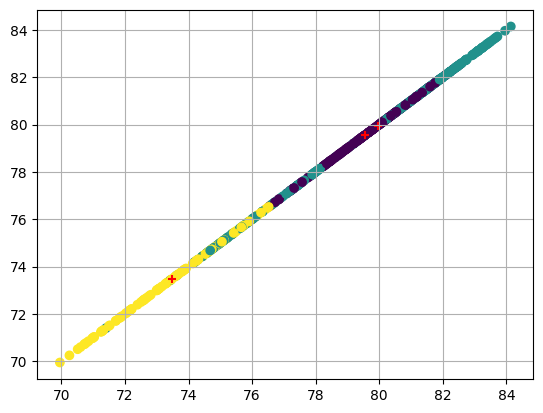

In [74]:
fig, ax = plt.subplots()
ax.scatter(filterByYear["life_expectancy"], filterByYear["life_expectancy"], c=filterByYear["cluster"])
ax.scatter(y_pred.cluster_centers_[:,1], y_pred.cluster_centers_[:,1], c='red', marker='+')
ax.grid(True)

plt.show()

In [75]:
forExport = filterByYear
labels = ['LOW','MEDIUM','HIGH']

def clusterToLabel(centers):
    labelMap = []
    # for c in arr:
    # centers = np.array([2.5, -1.2, 0.7])  # cluster 0,1,2
    sorted_labels = np.argsort(centers)       # array([1,2,0]) low->high
    rank_map = {int(lbl): rank for rank, lbl in enumerate(sorted_labels, start=0)}  # {1:1,2:2,0:3}
    # labels: array of shape (n_samples,) with cluster ids
    labels = np.array([0,0,1,2,1,2])
    # print(rank_map)
    return rank_map

clusterToLabel([0.5, 3, 2])

{0: 0, 2: 1, 1: 2}

In [76]:
for series_name, series in df.items():
    if series_name == "COUNTRY" or series_name == "SEX" or series_name == "YEAR":
        continue
    print(series_name)
    y_pred = KMeans(n_clusters=3).fit(filterByYear[[series_name,series_name]])
    y_pred.predict(filterByYear[[series_name,series_name]])
    y_pred.cluster_centers_
    filterByYear["cluster"] = y_pred.labels_
    filterByYear[["COUNTRY","YEAR",series_name,"cluster"]].head()

    # fig, ax = plt.subplots()
    # ax.scatter(filterByYear[series_name], filterByYear[series_name], c=filterByYear["cluster"])
    # ax.scatter(y_pred.cluster_centers_[:,1], y_pred.cluster_centers_[:,1], c='red', marker='+')
    # ax.grid(True)
    # ax.set_title(series_name)

    # # plt.show()

    relab = clusterToLabel(y_pred.cluster_centers_[:,1])

    for i in range(len(filterByYear[series_name])):
        forExport[series_name][i] = labels[relab.get(forExport['cluster'][i])]

forExport[forExport["COUNTRY"]=="Sweden"]

life_expectancy
average_number_of_calories_available_per_person_per_day
unemployment_rate
regular_daily_smokers
adult_overweight
alcahol_consumption_liter_per_capita
fat_available_ppd
protein_ppd
average_fruit_vegtable_ppd
annual_income
youth_unemployment_rate
Ischaemic_heart_diseas
circulatory_diseases
self_injury


C:\Users\ASUS\AppData\Local\Temp\ipykernel_39792\987723257.py:22: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  forExport[series_name][i] = labels[relab.get(forExport['cluster'][i])]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_39792\987723257

total_hospital_beds
cluster


C:\Users\ASUS\AppData\Local\Temp\ipykernel_39792\987723257.py:22: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  forExport[series_name][i] = labels[relab.get(forExport['cluster'][i])]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_39792\987723257

,COUNTRY,SEX,YEAR,life_expectancy,average_number_of_calories_available_per_person_per_day,unemployment_rate,regular_daily_smokers,adult_overweight,alcahol_consumption_liter_per_capita,fat_available_ppd,protein_ppd,average_fruit_vegtable_ppd,annual_income,youth_unemployment_rate,Ischaemic_heart_diseas,circulatory_diseases,self_injury,total_hospital_beds,cluster
535,Sweden,ALL,2000.0,HIGH,HIGH,LOW,MEDIUM,MEDIUM,HIGH,HIGH,HIGH,LOW,MEDIUM,MEDIUM,LOW,LOW,LOW,LOW,HIGH
536,Sweden,ALL,2001.0,HIGH,HIGH,LOW,LOW,MEDIUM,MEDIUM,HIGH,HIGH,LOW,MEDIUM,MEDIUM,LOW,LOW,LOW,LOW,HIGH
537,Sweden,ALL,2002.0,HIGH,HIGH,MEDIUM,LOW,MEDIUM,HIGH,HIGH,HIGH,MEDIUM,MEDIUM,MEDIUM,LOW,LOW,LOW,LOW,HIGH
538,Sweden,ALL,2003.0,HIGH,HIGH,MEDIUM,MEDIUM,MEDIUM,HIGH,HIGH,HIGH,MEDIUM,MEDIUM,MEDIUM,LOW,LOW,LOW,LOW,HIGH
539,Sweden,ALL,2004.0,HIGH,HIGH,MEDIUM,HIGH,MEDIUM,HIGH,HIGH,HIGH,MEDIUM,MEDIUM,MEDIUM,LOW,LOW,LOW,LOW,HIGH
540,Sweden,ALL,2005.0,HIGH,HIGH,MEDIUM,MEDIUM,MEDIUM,HIGH,HIGH,HIGH,LOW,MEDIUM,MEDIUM,LOW,LOW,LOW,LOW,HIGH
541,Sweden,ALL,2006.0,HIGH,HIGH,LOW,MEDIUM,MEDIUM,HIGH,HIGH,HIGH,MEDIUM,MEDIUM,MEDIUM,LOW,LOW,LOW,LOW,HIGH
542,Sweden,ALL,2007.0,HIGH,HIGH,LOW,MEDIUM,MEDIUM,MEDIUM,HIGH,MEDIUM,LOW,HIGH,MEDIUM,LOW,LOW,LOW,LOW,HIGH
543,Sweden,ALL,2008.0,HIGH,HIGH,LOW,HIGH,MEDIUM,HIGH,HIGH,MEDIUM,LOW,HIGH,MEDIUM,LOW,LOW,LOW,LOW,HIGH
544,Sweden,ALL,2009.0,HIGH,HIGH,LOW,MEDIUM,MEDIUM,MEDIUM,HIGH,MEDIUM,LOW,HIGH,LOW,LOW,LOW,LOW,LOW,HIGH


In [77]:
rename_map = {
    "life_expectancy": "LIFEEXP",
    "average_number_of_calories_available_per_person_per_day": "CALORIES",
    "unemployment_rate": "UNEMP",
    "regular_daily_smokers": "SMOKING",
    "adult_overweight": "OVERWT",
    "alcahol_consumption_liter_per_capita": "ALCOHOL",
    "fat_available_ppd": "FAT",
    "protein_ppd": "PROTEIN",
    "average_fruit_vegtable_ppd": "FRUITVEG",
    "annual_income": "ANNUALINCOME",  
    "youth_unemployment_rate": "YOUTH_UNEMP_RATE",  
    "Ischaemic_heart_diseas": "HEARTDISEAS",  
    "circulatory_diseases": "CIRCULATORYDISEAS",  
    "self_injury": "SELFINJURY",  
    "total_hospital_beds": "TOTALHOSPBED"  
}

# item_cols = [c+"_bin" for c in cols_to_bin]
# print(item_cols)

forExport = forExport.rename(columns=rename_map)

# df = pd.DataFrame({"z":["a","a"], "zz":["b","c"]}, index=[1,2])

# Option 1 — transform all columns to "col=val" strings
# df_transformed = df.apply(lambda col: col.index.map(lambda i, c=col.name: f"{c}={col.loc[i]}"))
# but simpler:
forExport2 = forExport.apply(lambda col: col.map(lambda v, name=col.name: f"{name}={v}")).copy()

print(forExport2)

# 1 transaction = one (COUNTRY, YEAR)
tx_df = (forExport2.sort_values(["COUNTRY","YEAR"])
           .drop_duplicates(subset=["COUNTRY","YEAR"]))


transactions = forExport2#tx_df.apply(row_to_items, axis=1).tolist()
transactions = transactions.drop(columns=["COUNTRY","YEAR","SEX","cluster"])
num_records = len(transactions)
# print(transactions)
print("Transactions:", num_records)

#pd.DataFrame(transactions).to_csv("rules_stat_cluster.csv", index=False)

             COUNTRY      SEX         YEAR         LIFEEXP       CALORIES  \
0    COUNTRY=Austria  SEX=ALL  YEAR=2000.0  LIFEEXP=MEDIUM   CALORIES=LOW   
1    COUNTRY=Austria  SEX=ALL  YEAR=2001.0  LIFEEXP=MEDIUM   CALORIES=LOW   
2    COUNTRY=Austria  SEX=ALL  YEAR=2002.0  LIFEEXP=MEDIUM   CALORIES=LOW   
3    COUNTRY=Austria  SEX=ALL  YEAR=2003.0  LIFEEXP=MEDIUM   CALORIES=LOW   
4    COUNTRY=Austria  SEX=ALL  YEAR=2004.0  LIFEEXP=MEDIUM   CALORIES=LOW   
..               ...      ...          ...             ...            ...   
553   COUNTRY=Sweden  SEX=ALL  YEAR=2018.0    LIFEEXP=HIGH  CALORIES=HIGH   
554   COUNTRY=Sweden  SEX=ALL  YEAR=2019.0    LIFEEXP=HIGH  CALORIES=HIGH   
555   COUNTRY=Sweden  SEX=ALL  YEAR=2020.0    LIFEEXP=HIGH  CALORIES=HIGH   
556   COUNTRY=Sweden  SEX=ALL  YEAR=2021.0    LIFEEXP=HIGH  CALORIES=HIGH   
557   COUNTRY=Sweden  SEX=ALL  YEAR=2022.0    LIFEEXP=HIGH  CALORIES=HIGH   

            UNEMP         SMOKING       OVERWT         ALCOHOL       FAT  \